In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [95]:
import numpy as np
import pylab as plt
from pprint import pprint
import xraylib

font = {'family': 'Droid Sans',
        'weight': 'normal',
        'size'  :  16}
matplotlib.rc('font', **font)

In [5]:
lambdas = np.arange(1e-6,3,0.001)

In [80]:
def bremsstrahlung(i, u, z):
    """
    Интенсивность тормозного излучения.
    
    Args:
        i (float): Ток в [A]
        u (float):  Напряжение [В]
        z (int): Порядковы номер элемента
    
    Returns:
        float: Интенсивность [a.u.]
    """
    c = 3.0 # скорость света
    lambda_0 = 12390/U # Критическая длина волны [A]
    lambdas = np.arange(lambda_0, 3,0.001)
    return lambdas, c*c/lambda_0*i*z*(lambdas-lambda_0)/lambdas**3

def absorption(chemical_name, density, l, lambdas):
    """
    TODO: add comments
    """
    cross_section = []
    for lambda_ in lambdas:
        e = 12.390/lambda_
        cross_section.append(xraylib.CS_Total_CP(chemical_name, e))
    mu = np.array(cross_section)*density
    absorption = np.exp(-mu*(l*1e2))
    return absorption

In [81]:
I = 0.1 # Ток в [A]
Z = 29 # Порядковы номер элемента
U = 20e3 # Напряжение [В]
L =1 # Толщина слоя воздуха [м]
rho_air = 1.29e-3 # плотность воздуха
rho_be = 1.85 # плотность Be

In [82]:
elements = {'Cu':{'z':29},
            'W' :{'z':78},
            'Ag':{'z':47},
            'Cr':{'z':29},
            'Mo':{'z':42}
            }
pprint(elements)

{'Ag': {'z': 47},
 'Cr': {'z': 29},
 'Cu': {'z': 29},
 'Mo': {'z': 42},
 'W': {'z': 78}}


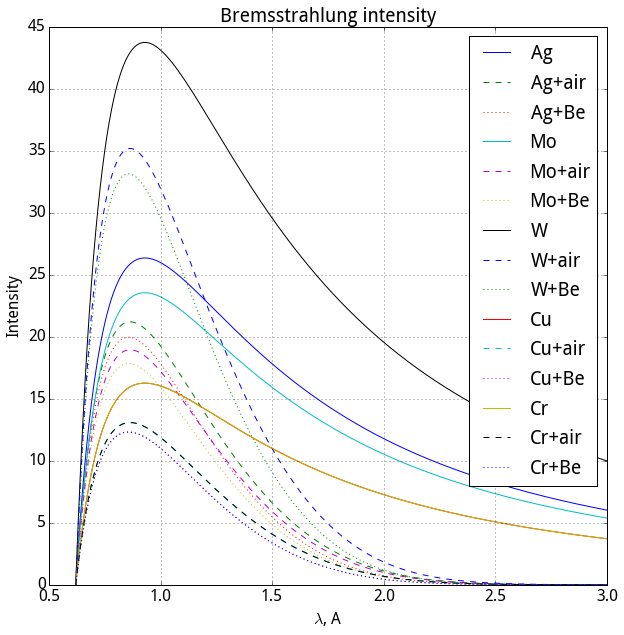

In [97]:
plt.figure(figsize=(10,10))
plt.title("Bremsstrahlung intensity")
for element_name, element_data in elements.items():
    lambdas, intensity = bremsstrahlung(I, U, element_data['z'])
    plt.plot(lambdas, intensity, label=element_name)
    plt.hold(True)
    intensity_abs = absorption('N4O',rho_air, L, lambdas)*intensity
    plt.plot(lambdas, intensity_abs, '--', label=element_name+'+air')
    intensity_abs = absorption('Be',rho_be, 1e-3, lambdas)*intensity_abs
    plt.plot(lambdas, intensity_abs, ':', label=element_name+'+Be')

plt.grid(True)
plt.legend()
plt.xlabel('$\lambda$, A')
plt.ylabel('Intensity')
plt.show()

In [22]:
intensity